## Quantum Signal Representation and Processing Using Quantum Fourier Transform 

In [1]:
# needs to be installed in env

!pip install qiskit
!pip install python-resize-image

In [163]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, QuantumRegister
from qiskit.qasm import pi
from qiskit.tools.visualization import plot_histogram, circuit_drawer
from qiskit import execute, Aer, BasicAer

import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt

from resizeimage import resizeimage
from PIL import Image

#frqi py code from:  https://github.com/Shedka/citiesatnight
import frqi

In [164]:
simulator = Aer.get_backend('qasm_simulator')

In [165]:
anc = QuantumRegister(1, "anc")
img = QuantumRegister(11, "img")
anc2 = QuantumRegister(1, "anc2")
c = ClassicalRegister(12)

#circuit gives the correct output only with 2 ancilla qubits for error correction that decrease error rate
# https://nvlpubs.nist.gov/nistpubs/Legacy/IR/nistir7103b.pdf

qc = QuantumCircuit(anc, img, anc2, c)

In [166]:
qc.draw()

anc_0: 
        
 img_0: 
        
 img_1: 
        
 img_2: 
        
 img_3: 
        
 img_4: 
        
 img_5: 
        
 img_6: 
        
 img_7: 
        
 img_8: 
        
 img_9: 
        
img_10: 
        
anc2_0: 
        
 c9: 12/

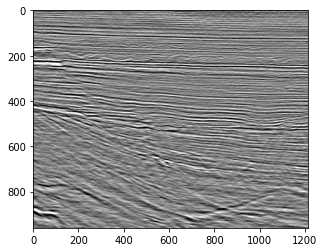

In [167]:
#converting to grayscale
image = Image.open("test.png").convert('LA')
plt.imshow(image);

In [168]:
print(image.size)

(1212, 960)


In [109]:
# original image as array for reference

[[114 168 168 ... 124 124 124]
 [114 168 168 ... 124 124 124]
 [110 210 210 ... 120 120 120]
 ...
 [161 133 133 ...  94  94  94]
 [161 133 133 ...  94  94  94]
 [161 126 126 ...  70  70  70]]


In [169]:
def image_normalization(image):
    
    # from https://github.com/VingtCinq/python-resize-image
    
    image = resizeimage.resize_cover(image, [32, 32])
    w, h = 32, 32
    image = np.array([[image.getpixel((x,y))[0] for x in range(w)] for y in range(h)])
    
    print('Image as array values in grayscale 0 to 255')
    print('')
    print(image)
    
    # 2-dimentional data convert to 1-dimentional array
    image = image.flatten()
    # change type
    image = image.astype('float64')
    # Normalization(0~pi/2)
    image /= 255.0
    generated_image = np.arcsin(image)

    return generated_image

image = image_normalization(image)

Image as array values in grayscale 0 to 255

[[133 128 129 ... 117 119 120]
 [135 137 133 ... 140 144 142]
 [117 120 122 ... 131 130 130]
 ...
 [141 138 113 ... 121 132 132]
 [123 126 148 ... 141 135 126]
 [140 125 119 ... 121 119 129]]


In [170]:
# code from Qiskit: https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html

def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    
    qft_rotations(circuit, n)
    
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

In [171]:
# encode to cpmutational basis
# https://github.com/Shedka/citiesatnight
for i in range(len(image)):
        if image[i] != 0:
                frqi.c10ry(qc, 2 * image[i], format(i, '010b'), img[0], anc2[0], [img[j] for j in range(1,len(img))])
# frqi  allows us to encode an image of size m = n x n (pixels) into log2(m) qubits.

qft(qc,12)

qc.measure(anc, c[0])
qc.measure(img, c[1:12])

print(qc.depth())


78924


In [ ]:
# too big it will lag
print(qc)

In [173]:
import time
t0 = time.time()

In [180]:
numOfShots = 9000   # number of runs

In [181]:
result = execute(qc, simulator, shots=numOfShots, backend_options={"fusion_enable":True}).result()
duration = time.time() - t0
print('time:', (duration,simulator), ' seconds')

/Users/sarahalwadaah/opt/anaconda3/envs/shor/lib/python3.7/site-packages/qiskit/execute_function.py:343: DeprecationWarning: Using `backend_options` kwarg has been deprecated as of qiskit-aer 0.7.0 and will be removed no earlier than 3 months from that release date. Runtime backend options should now be added directly using kwargs for each option.
  job = backend.run(experiments, **run_kwargs)


time: (1887.3783791065216, QasmSimulator('qasm_simulator'))  seconds


In [176]:
print(result.get_counts(qc))

{'110100100110': 1, '000001110110': 1, '101000101000': 1, '111100110111': 1, '010111100110': 1, '001010110011': 1, '110111001000': 1, '000000100011': 1, '101111100110': 1, '100000101001': 1, '101101001000': 1, '111101111000': 1, '101110010001': 1, '001101100101': 1, '111010010010': 1, '110100101010': 1, '101100010000': 1, '111100101100': 1, '101011111011': 1, '011000100101': 1, '110001111011': 1, '001100111011': 1, '010100001111': 1, '110110001001': 1, '010101101101': 1, '011101010000': 1, '100001110010': 1, '010010110101': 1, '101110011011': 1, '100010111000': 1, '110011011111': 1, '111100011101': 1, '101111001001': 1, '110010001000': 2, '101111111101': 1, '011111110111': 1, '101111001111': 1, '001000111010': 1, '011101110010': 1, '100010111111': 1, '111111000111': 1, '110111011101': 1, '011010101001': 1, '111000111011': 1, '101101000001': 1, '111111111110': 1, '000001000100': 1, '110000011001': 1, '010100011110': 1, '101010001011': 1, '001010000101': 1, '010110001011': 1, '0100010010

In [182]:
# decode
# https://github.com/Shedka/citiesatnight

# new array
genimg = np.array([])
for i in range(len(image)):
        try:
                genimg = np.append(genimg,[np.sqrt(result.get_counts(qc)[format(i, '010b')+'10']/numOfShots)])
        except KeyError:
                genimg = np.append(genimg,[0.0])

# inverse nomalization
genimg *= 32.0 * 255.0
# convert type
genimg = genimg.astype('int')
# back to 2-dimentional data
genimg = genimg.reshape((32,32))

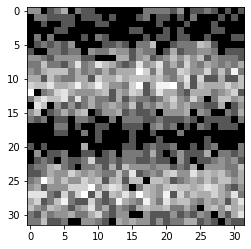

In [183]:
plt.imshow(genimg, cmap='gray', vmin=0, vmax=255)
#plt.savefig('qft_output.png')
plt.show()